In [1]:
import pandas as pd
import os
import json
import numpy as np
from functions import Convertor_Single
from functions import Convertor_Multiple
from functions import df_info
from functions import df_process_num
from functions import df_reshape
from functions import random_forest_classifier
from functions import df_pivot_multiple
from functions import pivot_diff_lag
from functions import merge_json_data
from functions import retrieve_and_merge_data

## STEP01: Transform CIK into JSON name format.

In [ ]:
df = pd.read_csv('Clustering Structure/df_clustered_80.csv')

In [ ]:
similar_companies = list(df['CIK'].unique())

In [ ]:
def num_to_cik(num_list):
    newlist = []
    for i in similar_companies:
        if len(str(i))==4:
            newlist.append('CIK000000' + str(i)+'.json')
        if len(str(i))==5:
            newlist.append('CIK00000' + str(i)+'.json')
        if len(str(i))==6:
            newlist.append('CIK0000' + str(i)+'.json')
        if len(str(i))==7:
            newlist.append('CIK000' + str(i)+'.json')
    return newlist

In [ ]:
newlist = []

In [ ]:
asd = num_to_cik(similar_companies)

In [ ]:
len(asd)

## STEP02: Submissions to CSV Function

In [ ]:
https://data.sec.gov/submissions/CIK0000105319.json

In [ ]:
import requests

def get_submission_data(cik):
    # Replace 'YOUR_CIK_HERE' with the actual CIK number.
    url = f'https://data.sec.gov/submissions/CIK{cik}.json'
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code
        data = response.json()
        return data
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("Oops: Something Else",err)

# Example usage:
cik = 'CIK0000277135'  # Replace with the actual CIK number
submission_data = get_submission_data(cik)
print(submission_data)


In [ ]:
import os
import json
import pandas as pd

# Path to the folder containing JSON files
folder_path = 'companyfacts'

# List to hold the data
data_list = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            # Load the content of the JSON file
            json_data = json.load(file)
            # Extract the desired data
            data = {
                'cik': json_data.get('cik', ''),
                'entityType': json_data.get('entityName', '')
            }
            data_list.append(data)

# Create a DataFrame from the list of data
df = pd.DataFrame(data_list)


In [ ]:
with open('companyfacts/CIK0000225263.json', 'r') as file:
    data = json.load(file)

In [ ]:
data.keys()

In [ ]:
data_list=[]

In [ ]:
dataframe = {
    'CIK': data.get('cik', ''),
    'NAME': data.get('entityName', ''),
    'FACTS': data.get('facts', '')
}
data_list.append(dataframe)

In [ ]:
df = pd.DataFrame(data_list)

In [ ]:
df

In [ ]:
import os
import json
import pandas as pd

# Path to the folder containing JSON files
folder_path = 'companyfacts'

# List to hold the data
data_list = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        try:
            with open(file_path, 'r') as file:
                # Load the content of the JSON file
                json_data = json.load(file)
                # Extract the desired data
                data = {
                    'cik': json_data['cik'],
                    'entityType': json_data['entityName']
                }
                data_list.append(data)
        except (KeyError, json.JSONDecodeError) as e:
            print(f"Skipping file {file_name} due to error: {e}")

# Create a DataFrame from the list of data
df = pd.DataFrame(data_list)

In [ ]:
import os
import json
import pandas as pd

def merge_json_data(folder_path, columns):
    """
    This function reads JSON files from the specified folder, extracts the specified keys,
    and merges them into a single pandas DataFrame. Files missing any of these keys are skipped.
    It also prints out the count of files processed by thousands.

    Parameters:
    folder_path (str): The path to the folder containing the JSON files.
    columns (list): A list of column names (keys) to extract from the JSON files.

    Returns:
    pd.DataFrame: A DataFrame containing the merged data.
    """
    data_list = []  # List to hold the data
    file_count = 0  # Counter for the number of files processed

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_count += 1
            file_path = os.path.join(folder_path, file_name)
            try:
                with open(file_path, 'r') as file:
                    # Load the content of the JSON file
                    json_data = json.load(file)
                    # Extract the desired data
                    data = {column: json_data[column] for column in columns}
                    data_list.append(data)
            except (KeyError, json.JSONDecodeError):
                continue  # Skip the file if an error occurs

    # Print the count of files processed by thousands
    print(f"Processed {file_count // 1000 * 1000} files.")

    # Create a DataFrame from the list of data
    return pd.DataFrame(data_list)

# Usage example:
folder_path = 'companyfacts'  # Replace with your folder path
columns = ['cik', 'entityName']  # Replace with your desired column names
df = merge_json_data(folder_path, columns)


In [ ]:
df

## STEP03: Converting Submissions

In [ ]:
company_ciks = parts[0]
keys_of_interest = ['cik', 'entityType', 'sic', 'sicDescription', 'name', 'tickers', 'exchanges']
df = retrieve_and_merge_data(company_ciks, keys_of_interest)

In [3]:
len(list(os.listdir('companyfacts')))

17693

In [ ]:
df.to_csv('submissions_merged.csv',index=False)

In [44]:
df

""


In [3]:
def split_list(lst, n):
    """Split a list into n equal parts."""
    k, m = divmod(len(lst), n)
    return [lst[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

# Example usage:
my_list = list(os.listdir('companyfacts'))
parts = split_list(my_list, 200)

In [4]:
len(parts[0])

89

In [2]:
import concurrent.futures
import requests
import pandas as pd

def fetch_data(cik, headers, keys_of_interest):
    url = f'https://data.sec.gov/submissions/{cik}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return {key: data.get(key, None) for key in keys_of_interest}
    else:
        print(f'Failed to retrieve data for CIK: {cik}')
        return None

def retrieve_and_merge_data(company_ciks, keys_of_interest):
    headers = {'User-Agent': 'YourAppName/1.0 (your-email@example.com)'}
    company_data = []
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future_to_cik = {executor.submit(fetch_data, cik, headers, keys_of_interest): cik for cik in company_ciks}
        for future in concurrent.futures.as_completed(future_to_cik):
            data = future.result()
            if data:
                company_data.append(data)

    return pd.DataFrame(company_data)


In [5]:
company_ciks = parts[0]
keys_of_interest = ['cik', 'entityType', 'sic', 'sicDescription', 'name', 'tickers', 'exchanges']

In [34]:
headers = {'User-Agent': 'YourAppName/1.0 (your-email@example.com)'}
url = f'https://data.sec.gov/submissions/CIK0001816581.json'
response = requests.get(url, headers=headers)
data = response.json()
data.keys()

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])

In [3]:
len(os.listdir('sub'))

882437

In [4]:
def merge_json_data(folder_path, columns):
    """
    This function reads JSON files from the specified folder, extracts the specified keys,
    and merges them into a single pandas DataFrame. Files missing any of these keys are skipped.
    It also prints out the count of files processed by thousands.

    Parameters:
    folder_path (str): The path to the folder containing the JSON files.
    columns (list): A list of column names (keys) to extract from the JSON files.

    Returns:
    pd.DataFrame: A DataFrame containing the merged data.
    """
    data_list = []  # List to hold the data
    file_count = 0  # Counter for the number of files processed

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_count += 1
            file_path = os.path.join(folder_path, file_name)
            try:
                with open(file_path, 'r') as file:
                    # Load the content of the JSON file
                    json_data = json.load(file)
                    # Extract the desired data
                    data = {column: json_data[column] for column in columns}
                    data_list.append(data)
            except (KeyError, json.JSONDecodeError):
                continue  # Skip the file if an error occurs

    # Print the count of files processed by thousands
    print(f"Processed {file_count // 1000 * 1000} files.")

    # Create a DataFrame from the list of data
    return pd.DataFrame(data_list)

In [ ]:
folder_path = 'companyfacts'  # Replace with your folder path
columns = ['cik', 'entityName']  # Replace with your desired column names
df = merge_json_data(folder_path, columns)

In [18]:
data_list=[]

In [19]:
for file_name in os.listdir('companyfacts'):
    file_path = os.path.join('sub',file_name)
    if file_name.endswith('.json'):
        try:
            with open(file_path, 'r') as file:
                # Load the content of the JSON file
                json_data = json.load(file)
                # Extract the desired data
                data = {'CIK': json_data['cik'],
                        'Type':json_data['entityType'], 
                        'SIC': json_data['sic'],
                        'Description':json_data['sicDescription'], 
                        'Name': json_data['name'],
                        'Ticker':json_data['tickers'], 
                        'Exchange':json_data['exchanges']}
                data_list.append(data)
        except (KeyError, json.JSONDecodeError):
            continue  # Skip the file if an error occurs

In [21]:
pd.DataFrame(data_list).to_csv('Submissions.csv',index=False)

In [23]:
os.getcwd()

'/Users/khatansanaabandi/Documents/Python/SEC V3'

In [24]:
df = pd.DataFrame(data_list)

## SIC EDA

In [33]:
len(df['SIC'].unique())

435

In [28]:
len(df[df['Type']=='operating']['Type'])

14203

In [29]:
len(df[df['Type']=='other']['Type'])

2621

In [30]:
len(df[df['Type']=='investment']['Type'])

868

In [35]:
import pandas as pd

# Assuming df is your DataFrame and 'SIC' is the column of interest
# Count the occurrences of each unique item in 'SIC'
sic_counts = df['SIC'].value_counts()

# Convert the series to a DataFrame
sic_counts_df = sic_counts.reset_index()

# Rename the columns to reflect the content
sic_counts_df.columns = ['SIC', 'Count']

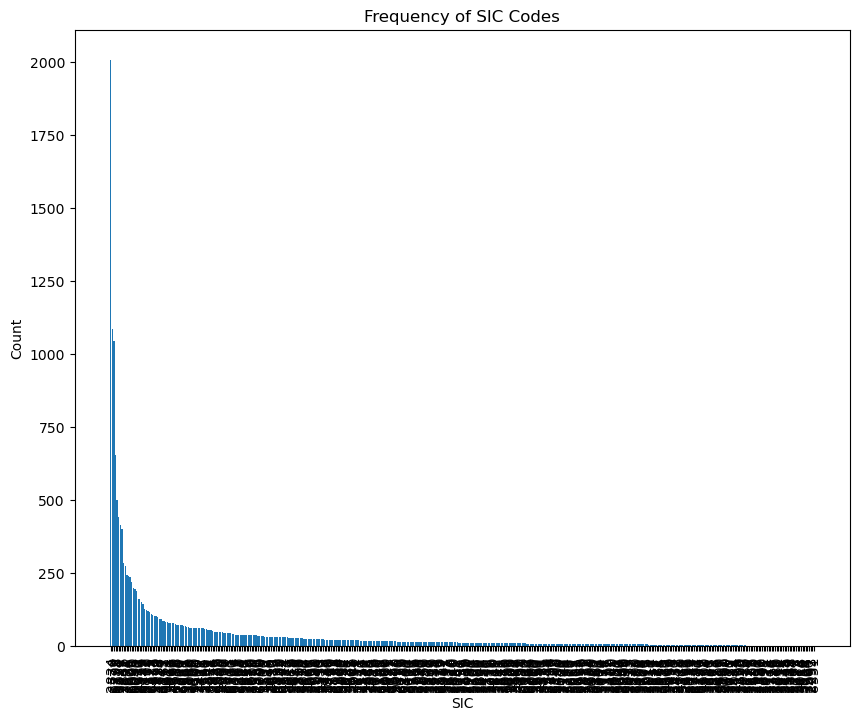

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sic_counts_df is your DataFrame from the previous step
# and it has 'SIC' and 'Count' columns

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sic_counts_df = sic_counts_df.sort_values('Count', ascending=False)  # Sort the DataFrame by 'Count'
plt.bar(sic_counts_df['SIC'], sic_counts_df['Count'])  # Create a bar chart
plt.xlabel('SIC')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Frequency of SIC Codes')  # Title of the chart
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.show()  # Display the plot


In [38]:
sic_counts_df

,SIC,Count
0,,2008
1,2834,1087
2,6770,1045
3,7372,653
4,6798,502
...,...,...
422,7384,1
421,3260,1
419,2092,1
418,2253,1


In [55]:
import pandas as pd

# Assuming you have two DataFrames: df1 and df2
# And a common key column named 'KeyColumn' that you want to merge on

# Merge df1 and df2 on 'KeyColumn'
merged_df = pd.merge(df, sic_counts_df, on='SIC', how='inner')



In [59]:
sic_counts_df.to_csv('sic_counts.csv', index=False)

In [60]:
df.columns

Index(['CIK', 'Type', 'SIC', 'Description', 'Name', 'Ticker', 'Exchange'], dtype='object')

In [71]:
import pandas as pd

# Assuming you have two DataFrames: df1 and df2
# And you want to look up values from 'lookup_column' in df2 based on 'key_column' in df1

# Perform the equivalent of VLOOKUP
result_df = pd.merge(sic_counts_df, df, left_on='SIC', right_on='CIK', how='left')
result_df
# 'how='left'' ensures that all rows from the left DataFrame (df1) are included in the

,SIC_x,Count,CIK,Type,SIC_y,Description,Name,Ticker,Exchange
0,,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2834,1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6770,1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7372,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6798,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
430,7384,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,3260,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,2092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,2253,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## SIC EDA v2

In [24]:
df = pd.read_csv('sic_counts.csv')

In [25]:
df = df[1:]

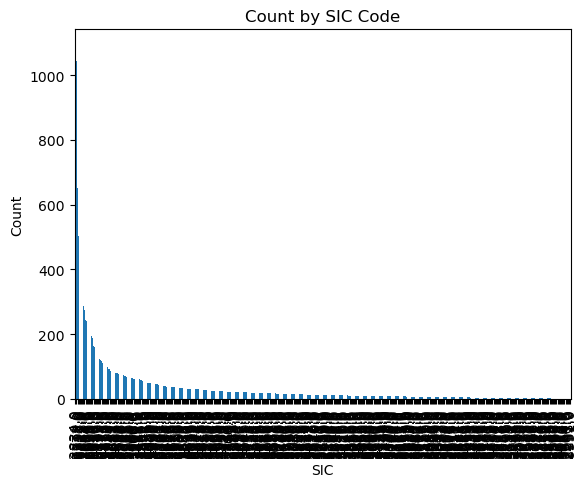

In [27]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df.plot(kind='bar', x='SIC', y='Count', legend=False)
plt.xlabel('SIC')
plt.ylabel('Count')
plt.title('Count by SIC Code')
plt.show()


In [26]:
df

,SIC,Count,Description
1,2834.0,1087,Pharmaceutical Preparations
2,6770.0,1045,Blank Checks
3,7372.0,653,Services-Prepackaged Software
4,6798.0,502,Real Estate Investment Trusts
5,1311.0,441,Crude Petroleum & Natural Gas
...,...,...,...
430,7384.0,1,Services-Photofinishing Laboratories
431,3260.0,1,Pottery & Related Products
432,2092.0,1,Prepared Fresh or Frozen Fish & Seafoods
433,2253.0,1,Knit Outerwear Mills
